In [1]:
import pandas as pd
import numpy as np

In [2]:
book = pd.read_csv('E:/my_courses/data mining/project/goodbooks-10k-master/books.csv')


In [3]:
rating = pd.read_csv('E:/my_courses/data mining/project/goodbooks-10k-master/ratings.csv')


In [4]:
to_read = pd.read_csv('E:/my_courses/data mining/project/goodbooks-10k-master/to_read.csv')


In [5]:
tags = pd.read_csv('E:/my_courses/data mining/project/goodbooks-10k-master/tags.csv')


In [6]:
book_tags = pd.read_csv('E:/my_courses/data mining/project/goodbooks-10k-master/book_tags.csv')

## Data cleaning

In [7]:
book.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


### Missing values 

In [8]:
# Checking the missing values
book.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

## isbn and isbn13 missing values

### title of books are not null so we can find the isbn code of books which don't have isbn
#### pip install isbntools

In [9]:
import sys
from isbntools.app import *
import pyisbn

In [34]:
#k = 0 
def isbn_creator(k1=0,k2=2000):
    for i in book[((book.isbn.isnull()==True) | (book.isbn13.isnull()==True)) & (((book.book_id <= k2)==True)& ((book.book_id >=k1)==True))].index:
        flag = 0 
        if (book.loc[[i]].isbn.isnull().bool() == False):
            print(i)
            if pyisbn.validate(str((book.loc[i].isbn)).zfill(10))==True:
                flag = 1
                book.loc[[i]] = book.loc[[i]].replace({'isbn13':np.nan},{'isbn13':float(pyisbn.convert(str(book.loc[i].isbn).zfill(10)))}) 
        elif book.loc[[i]].isbn13.isnull().bool() == False:
            if ((((str(int(book.loc[i].isbn13))).startswith(('978')))==True) and (len(str(int(book.loc[i].isbn13)))==13)and(pyisbn.validate(str(int(book.loc[i].isbn13)))==True)):
                flag = 1
                book.loc[[i]] = book.loc[[i]].replace({'isbn':np.nan},{'isbn': (pyisbn.convert(str(int(book.loc[i].isbn13))))}) 
            
        if flag == 0 :
            
            isbn = isbn_from_words(str(book.loc[[i]].title))
            #print(i)
            if (book.loc[[i]].isbn.isnull().bool() == True):
                if len(str(isbn))<=10:
                    book.loc[[i]] = book.loc[[i]].replace({'isbn':np.nan},{'isbn':str(isbn).zfill(10)}) 
                elif str(isbn)[:3]=='978':
                    book.loc[[i]] = book.loc[[i]].replace({'isbn':np.nan},{'isbn': (pyisbn.convert(str(isbn)))}) 

            if book.loc[[i]].isbn13.isnull().bool() == True:
                if len(str(isbn))==13:
                    book.loc[[i]] = book.loc[[i]].replace({'isbn13':np.nan},{'isbn13':float(isbn)}) 
                else:
                    book.loc[[i]] = book.loc[[i]].replace({'isbn13':np.nan},{'isbn13':float(pyisbn.convert(str(isbn).zfill(10)))}) 

        flag = 0 
                
    #k += 1
#print(k)

In [35]:
isbn_creator(0,2000)
print("1")
isbn_creator(2000,4000)
print("2")
isbn_creator(4000,6000)
print("3")
isbn_creator(6000,8000)
print("4")
isbn_creator(8000,10000)
print("5")

1094
1
2138
2587
3092
2
5129
3
6088
6498
6689
7158
7638
7830
4
8335
8664
8803
9032
9050
9465
9511
9857
5


In [36]:
# isbn and isbn13 has no null value
book.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                            2
isbn13                          0
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [37]:
book[book.isbn.isnull()==True]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
6235,6236,13603717,13603717,19197480,8,NaN,2.346236e+12,Hugh Howey,2012.0,First Shift: Legacy,...,15136,15475,829,91,321,2287,6302,6474,https://images.gr-assets.com/books/1334528415m...,https://images.gr-assets.com/books/1334528415s...
6302,6303,18105011,18105011,25423841,7,NaN,9.791191e+12,Tillie Cole,2013.0,NaN,...,28658,28775,2087,958,1568,4659,9524,12066,https://images.gr-assets.com/books/1376473414m...,https://images.gr-assets.com/books/1376473414s...


In [53]:
# row 6235
# isbn13 = 9781475154771
#isbn = 1475154771
book.loc[[6235]] = book.loc[[6235]].replace({'isbn':np.nan},{'isbn':'1475154771'})
book.loc[[6235]] = book.loc[[6235]].replace({'isbn13':book.loc[[6235]].isbn13},{'isbn13':9781475154771})
book.loc[[6235]]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
6235,6236,13603717,13603717,19197480,8,1475154771,9.781475e+12,Hugh Howey,2012.0,First Shift: Legacy,...,15136,15475,829,91,321,2287,6302,6474,https://images.gr-assets.com/books/1334528415m...,https://images.gr-assets.com/books/1334528415s...


In [55]:
# row 6302 doesn't have isbn 
meta('9791190908924')


{'ISBN-13': '9791190908924',
 'Title': '스위트 홈 세트(4-6권)(전3권)',
 'Authors': ['김칸비'],
 'Publisher': '',
 'Year': '2020',
 'Language': 'ko'}

In [56]:
book_zero_isbn_null = book.copy()

In [58]:
book_zero_isbn_null.to_csv('E:/my_courses/data mining/project/goodbooks-10k-master/book_zero_isbn_null.csv')

### check if isbn and isbn13 are correct in dataset

some of isbn13 are not valid 

In [59]:
(book_zero_isbn_null[((book_zero_isbn_null.isbn.isnull()==False))].index).shape

(9999,)

In [60]:
k = 0 
for i in book_zero_isbn_null[book_zero_isbn_null.isbn.isnull()==False].index:
    if pd.isna(pd.to_numeric(book_zero_isbn_null.loc[i].isbn, errors='coerce'))== False:
        
        if (pyisbn.validate(str(int(book_zero_isbn_null.loc[i].isbn)).zfill(10))==True) and ((((str(int(book_zero_isbn_null.loc[i].isbn13))).startswith(('978', '979')))==False) or (len(str(int(book_zero_isbn_null.loc[i].isbn13)))<13)or(pyisbn.validate(str(int(book_zero_isbn_null.loc[i].isbn13)))==False)):
            book_zero_isbn_null.loc[[i]] = book_zero_isbn_null.loc[[i]].replace({'isbn13':book_zero_isbn_null.loc[i].isbn13},{'isbn13':float(pyisbn.convert(str(int(book_zero_isbn_null.loc[i].isbn)).zfill(10)))})
            k = k + 1
            #print(i)
    else:
        if (pyisbn.validate(str((book_zero_isbn_null.loc[i].isbn)).zfill(10))==True) and ((((str(int(book_zero_isbn_null.loc[i].isbn13))).startswith(('978', '979')))==False) or (len(str(int(book_zero_isbn_null.loc[i].isbn13)))<13)or(pyisbn.validate(str(int(book_zero_isbn_null.loc[i].isbn13)))==False)):
            book_zero_isbn_null.loc[[i]] = book_zero_isbn_null.loc[[i]].replace({'isbn13':book_zero_isbn_null.loc[i].isbn13},{'isbn13':float(pyisbn.convert(str((book_zero_isbn_null.loc[i].isbn)).zfill(10)))})
            k = k + 1
            #print("isbn with x at the end: ",i)
        
print(k)

8439


In [61]:
print("corrupted isbns were : ",k)

corrupted isbns were :  8439


### original_publication_year missing value

In [62]:
book_zero_year_null = book_zero_isbn_null.copy()

In [63]:
book_zero_year_null.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [64]:
len(book_zero_year_null[(book_zero_year_null.original_publication_year.isnull()==True)])

21

In [65]:
error_row = 5871

In [66]:
for i in book_zero_year_null[(book_zero_year_null.original_publication_year.isnull()==True)].index:
    print(i)
    if i == 5871:
        continue
    if len(meta(str(int(book_zero_year_null.loc[i].isbn13))))!=0:
        book_zero_year_null.loc[[i]] = book_zero_year_null.loc[[i]].replace({'original_publication_year':np.nan},{'original_publication_year':float(meta(str(int(book_zero_year_null.loc[i].isbn13)))["Year"])}) 
    else:
        print("i is :",i," ",str(int(book_zero_year_null.loc[i].isbn13)))

219
i is : 219   9780316043137
975
i is : 975   9780793551613
3505
4228
4247
i is : 4247   9780312530648
4409
4707
4770
4877
5609
5871
6428
i is : 6428   9780448445861
7190
i is : 7190   9786133213685
7215
7416
i is : 7416   9780439287197
7645
8476
i is : 8476   9780141319629
9196
9510
9533
i is : 9533   9780743296885
9928


In [67]:
len(book_zero_year_null[(book_zero_year_null.original_publication_year.isnull()==True)])

9

so we have to solve other 9 rows
they can be searched from internet

In [68]:
# find isbn13 of error_row
book_zero_year_null.loc[error_row].isbn13

9780142196588.0

In [69]:
#i is 219 and isbn is 9780316043137
j = 219
book_zero_year_null.loc[[j]] = book_zero_year_null.loc[[j]].replace({'original_publication_year':np.nan},{'original_publication_year':2008}) 

j = 975
book_zero_year_null.loc[[j]] = book_zero_year_null.loc[[j]].replace({'original_publication_year':np.nan},{'original_publication_year':1998}) 

j = 4247   
book_zero_year_null.loc[[j]] = book_zero_year_null.loc[[j]].replace({'original_publication_year':np.nan},{'original_publication_year':2010}) 

j = 6428   
book_zero_year_null.loc[[j]] = book_zero_year_null.loc[[j]].replace({'original_publication_year':np.nan},{'original_publication_year':2006}) 

j = 7190   
book_zero_year_null.loc[[j]] = book_zero_year_null.loc[[j]].replace({'original_publication_year':np.nan},{'original_publication_year':2010}) 

j = 7416   
book_zero_year_null.loc[[j]] = book_zero_year_null.loc[[j]].replace({'original_publication_year':np.nan},{'original_publication_year':2001}) 

j = 8476
book_zero_year_null.loc[[j]] = book_zero_year_null.loc[[j]].replace({'original_publication_year':np.nan},{'original_publication_year':2004}) 

j = 9533   
book_zero_year_null.loc[[j]] = book_zero_year_null.loc[[j]].replace({'original_publication_year':np.nan},{'original_publication_year':2007}) 

j = error_row

book_zero_year_null.loc[[j]] = book_zero_year_null.loc[[j]].replace({'original_publication_year':np.nan},{'original_publication_year':2015}) 


In [70]:
len(book_zero_year_null[(book_zero_year_null.original_publication_year.isnull()==True)])

0

In [71]:

book_zero_year_null.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                            1
isbn13                          0
authors                         0
original_publication_year       0
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [72]:
book_zero_year_null.to_csv('E:/my_courses/data mining/project/goodbooks-10k-master/book_zero_year_null.csv')

### missing value of original_title

In [79]:
book_zero_original_title_null = book_zero_year_null.copy()

In [81]:
len(book_zero_original_title_null[book_zero_original_title_null.original_title.isnull()==True])

585

In [95]:
for i in book_zero_original_title_null[book_zero_original_title_null.original_title.isnull()==True].index:
    book_zero_original_title_null.loc[[i]] = book_zero_original_title_null.loc[[i]].replace({'original_title':np.nan},{'original_title':book_zero_original_title_null.loc[[i]].title}) 

In [96]:
len(book_zero_original_title_null[book_zero_original_title_null.original_title.isnull()==True])

0

In [97]:
book_zero_original_title_null.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                            1
isbn13                          0
authors                         0
original_publication_year       0
original_title                  0
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [98]:
book_zero_original_title_null.to_csv('E:/my_courses/data mining/project/goodbooks-10k-master/book_zero_original_title_null.csv')

### missing language codes

In [121]:
book_zero_language_null = book_zero_original_title_null.copy()

In [122]:
len(book_zero_language_null[book_zero_language_null.language_code.isnull()==True])

1084

In [123]:
book_zero_language_null.language_code.value_counts()

eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
jpn         7
per         7
por         6
pol         6
en          4
nor         3
dan         3
fil         2
ita         2
swe         1
vie         1
tur         1
rus         1
rum         1
nl          1
mul         1
Name: language_code, dtype: int64

as we see we have eng and en in languages, so it is better to merge en and eng

In [134]:
book_zero_language_null = book_zero_language_null.replace({'language_code':"eng"},{'language_code':"en"}) 

In [135]:
book_zero_language_null.language_code.value_counts()

en       6345
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
jpn         7
per         7
por         6
pol         6
dan         3
nor         3
fil         2
ita         2
tur         1
rus         1
nl          1
rum         1
vie         1
swe         1
mul         1
Name: language_code, dtype: int64

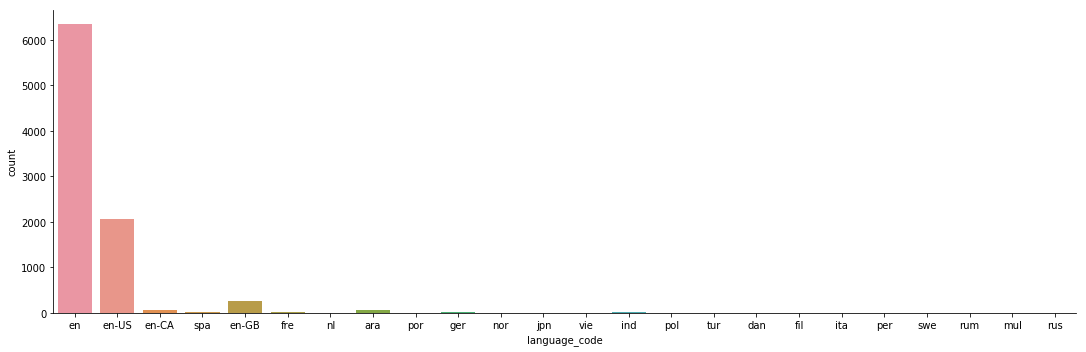

In [136]:
import seaborn as sns
sns.catplot(x='language_code', kind = 'count', data=book_zero_language_null,height=5, aspect=3)

In [144]:
for i in book_zero_language_null[book_zero_language_null.language_code.isnull()==True].index:
    if len(meta(str(book_zero_language_null.loc[i].isbn).zfill(10)))==0:
        print("meta doesn't have i= ",i)
        continue
    print(i)
    book_zero_language_null.loc[[i]] = book_zero_language_null.loc[[i]].replace({'language_code':np.nan},{'language_code':meta(str(book_zero_language_null.loc[i].isbn).zfill(10))["Language"]}) 

meta doesn't have i=  412
meta doesn't have i=  464
486
meta doesn't have i=  552
meta doesn't have i=  604
639
737
739
740
786
789
meta doesn't have i=  797
798
842
912
957
meta doesn't have i=  962
965
meta doesn't have i=  975
976
985
meta doesn't have i=  991
1011
meta doesn't have i=  1012
meta doesn't have i=  1053
1056
meta doesn't have i=  1096
meta doesn't have i=  1102
1106
1123
meta doesn't have i=  1132
1176
1184
1202
1220
1239
1244
1276
1319
1356
1376
1417
meta doesn't have i=  1425
1443
1445
meta doesn't have i=  1446
1488
1494
1496


NotValidISBNError: (0385535144) is not a valid ISBN

In [122]:
len(book_zero_language_null[book_zero_language_null.language_code.isnull()==True])

1084

In [143]:
len(meta(str(book_zero_language_null.loc[i].isbn).zfill(10)))

0